In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
import seaborn as sns

In [2]:
diabetes=load_diabetes()
x,y=diabetes.data,diabetes.target
y_binary=(y>np.median(y)).astype(int)
y_binary

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [3]:
 x_train,x_test,y_train,y_test=train_test_split(x,y_binary,test_size=0.2,random_state=44)

In [4]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [5]:
model=LogisticRegression()
model.fit(x_train,y_train)
x_train

array([[-0.6731859 , -0.91571921,  1.02726635, ..., -0.01786768,
         1.38726136, -0.48937069],
       [ 0.23555071, -0.91571921, -0.50298977, ..., -1.57714882,
        -1.44918764,  0.28106077],
       [ 1.59865561,  1.09203781, -0.48015013, ...,  1.74412   ,
        -0.71697921,  1.22269921],
       ...,
       [ 0.61419096,  1.09203781, -0.13755547, ..., -0.13481377,
        -0.55797075,  1.22269921],
       [-0.44600175, -0.91571921, -1.11966015, ..., -0.79750825,
        -1.49019991, -0.06135321],
       [ 0.23555071, -0.91571921,  0.59331312, ..., -0.01786768,
         1.2641866 , -0.40376719]])

In [6]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7865168539325843

In [7]:
print(confusion_matrix(y_test,y_pred))

[[31  4]
 [15 39]]


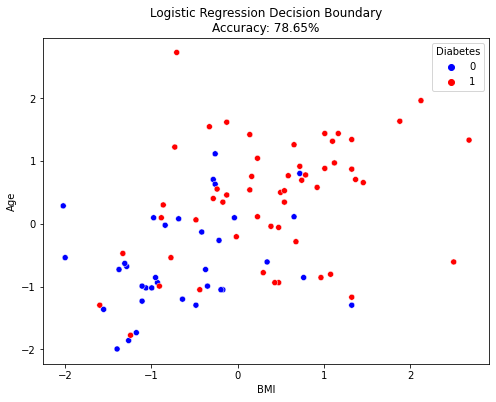

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_test[:, 2], y=x_test[:, 8], hue=y_test, palette={
0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
 accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()